In [1]:
# Given list of dictionaries

users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"}
]

In [6]:
import pandas as pd

# convert list of dict into dataframe
users_df = pd.DataFrame(users)
users_df

,id,name
0,0,Hero
1,1,Dunn
2,2,Sue
3,3,Chi
4,4,Thor
5,5,Clive
6,6,Hicks
7,7,Devin
8,8,Kate
9,9,Klein


In [7]:
# Given list of tuples

friendship_pairs = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4),
                    (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]
print(friendship_pairs)

[(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


In [8]:
# Convert list of tuples into dataframe

friendship_pairs_df = pd.DataFrame(friendship_pairs, columns = ["source", "target"])
friendship_pairs_df

,source,target
0,0,1
1,0,2
2,1,2
3,1,3
4,2,3
5,3,4
6,4,5
7,5,6
8,5,7
9,6,8


In [29]:
users

# create nodes list
nodes = []

# extract all users 'id', append to nodes list
for d in users:
    for x,y in d.items():
        if isinstance(y, int):
            nodes.append(y)
        else:
            print("not an integer")

nodes

not an integer
not an integer
not an integer
not an integer
not an integer
not an integer
not an integer
not an integer
not an integer
not an integer


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
import networkx as nx

# create networkx.classes.graph.Graph
G = nx.Graph()

# add node to G
G.add_nodes_from(nodes)

# add edges to G
G.add_edges_from(friendship_pairs)

print("Nodes of graphs: ")
print(G.nodes())
print("Edges of graphs: ")
print(G.edges())

Nodes of graphs: 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Edges of graphs: 
[(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


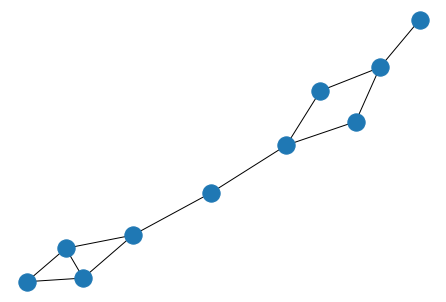

In [37]:
import matplotlib.pyplot as plt

# plot network graph
nx.draw(G)
plt.show()

In [40]:
# create a dict, where keys are users id, 
friendships = {user["id"]: [] for user in users}

for i, j in friendship_pairs:
    friendships[i].append(j)
    friendships[j].append(i)
    
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [46]:
friendships_df = pd.DataFrame.from_dict(friendships, orient="index")

friendships_df

,0,1,2
0,1,2.0,NaN
1,0,2.0,3.0
2,0,1.0,3.0
3,1,2.0,4.0
4,3,5.0,NaN
5,4,6.0,7.0
6,5,8.0,NaN
7,5,8.0,NaN
8,6,7.0,9.0
9,8,NaN,NaN


In [48]:
friendships_df.reset_index(inplace=True)

In [49]:
friendships_df = friendships_df.rename(columns = {"id":"new column name"})
friendships_df


,index,0,1,2
0,0,1,2.0,NaN
1,1,0,2.0,3.0
2,2,0,1.0,3.0
3,3,1,2.0,4.0
4,4,3,5.0,NaN
5,5,4,6.0,7.0
6,6,5,8.0,NaN
7,7,5,8.0,NaN
8,8,6,7.0,9.0
9,9,8,NaN,NaN


In [51]:
friendships_df = friendships_df.rename(columns = {'index':'id'})
friendships_df

,id,0,1,2
0,0,1,2.0,NaN
1,1,0,2.0,3.0
2,2,0,1.0,3.0
3,3,1,2.0,4.0
4,4,3,5.0,NaN
5,5,4,6.0,7.0
6,6,5,8.0,NaN
7,7,5,8.0,NaN
8,8,6,7.0,9.0
9,9,8,NaN,NaN


In [52]:
users_friendships = pd.merge(users_df, friendships_df, on='id')
users_friendships

,id,name,0,1,2
0,0,Hero,1,2.0,NaN
1,1,Dunn,0,2.0,3.0
2,2,Sue,0,1.0,3.0
3,3,Chi,1,2.0,4.0
4,4,Thor,3,5.0,NaN
5,5,Clive,4,6.0,7.0
6,6,Hicks,5,8.0,NaN
7,7,Devin,5,8.0,NaN
8,8,Kate,6,7.0,9.0
9,9,Klein,8,NaN,NaN


In [53]:
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]
num_friends_by_id

NameError: name 'number_of_friends' is not defined